# COMP5310: Assignment 1
## Research Question:
## Are we able to predict, if a player can win the match, after losing the first set?
#### By Jesse S. Narvasa
#### Uni ID: jnar3156

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

In [2]:
# loading training datasets

data_path = './data/'
filenames = ['2019.xlsx', '2018.xlsx', '2017.xlsx', '2016.xlsx', '2015.xlsx', '2014.xlsx', '2013.xlsx', '2012.xls', '2011.xls', '2010.xls']
columns = pd.read_excel(data_path + filenames[0], header=None)
columns = columns.loc[0,:].values.tolist()

# instantiating an empty dataframe
training_df = pd.DataFrame(columns=columns)

# iterating through our files to load all the training data for different years
for filename in filenames:
    data = pd.read_excel(data_path + filename, index_col=None, header=0)
    training_df = training_df.append(data, ignore_index=True)

# loading our dataframe
training_df

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,MaxW,MaxL,AvgW,AvgL,EXW,EXL,LBW,LBL,SJW,SJL
0,1,Brisbane,Brisbane International,2018-12-31,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,1.42,3.60,1.35,3.18,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Brisbane,Brisbane International,2018-12-31,ATP250,Outdoor,Hard,1st Round,3,Raonic M.,...,1.27,4.84,1.22,4.26,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Brisbane,Brisbane International,2018-12-31,ATP250,Outdoor,Hard,1st Round,3,Kecmanovic M.,...,1.71,2.40,1.63,2.28,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Brisbane,Brisbane International,2018-12-31,ATP250,Outdoor,Hard,1st Round,3,Millman J.,...,1.45,3.20,1.40,2.95,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Brisbane,Brisbane International,2018-12-31,ATP250,Outdoor,Hard,1st Round,3,Uchiyama Y.,...,3.26,1.53,2.69,1.47,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,65,London,Masters Cup,2010-11-26,Masters Cup,Indoor,Hard,Round Robin,3,Nadal R.,...,1.25,5.25,1.19,4.57,1.2,4.25,1.20,4.33,1.20,4.50
26324,65,London,Masters Cup,2010-11-26,Masters Cup,Indoor,Hard,Round Robin,3,Djokovic N.,...,1.48,3.15,1.40,2.88,1.4,2.75,1.36,3.00,1.44,2.75
26325,65,London,Masters Cup,2010-11-27,Masters Cup,Indoor,Hard,Semifinals,3,Nadal R.,...,1.65,2.75,1.52,2.50,1.5,2.50,1.50,2.50,1.53,2.50
26326,65,London,Masters Cup,2010-11-27,Masters Cup,Indoor,Hard,Semifinals,3,Federer R.,...,1.50,3.24,1.40,2.92,1.4,2.80,1.44,2.63,1.36,3.00


In [ ]:
# exporting to Excel for quick visualisation purposes

training_df.to_excel('output.xlsx')

In [3]:
# Data Cleaning
# Removing entries where the match was not completed
training_df = training_df[training_df['Comment']=='Completed']

# Datatype conversion, changing inconsistent data values to NaN with errors='coerce'
date_columns = ['Date']
numeric_columns = ['WRank', 'LRank', 'WPts', 'LPts', 'W1', 'L1']

training_df[date_columns] = training_df[date_columns].apply(pd.to_datetime, errors='coerce')
training_df[numeric_columns] = training_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

c:\users\jsnar\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [4]:
# since our dataset is already structured, such that the winner and loser player is arranged for each event
# then we need to create a new dataframe, such that the player behind will be relabelled as Player, and the other as 
# Opponent respectively.  We can then provide labels on 0 or 1 for "has_won" which will be our new feature

common_cols = ['Date', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts', 'W1', 'L1']

winner_matches_df = training_df[common_cols].copy(deep=True)
loser_matches_df = training_df[common_cols].copy(deep=True)

winner_matches_df['Has_Won'] = 1
loser_matches_df['Has_Won'] = 0

winner_matches_df.rename(columns={
    'Winner': 'Player',
    'Loser': 'Opponent',
    'WRank': 'PRank',
    'LRank': 'ORank',
    'WPts': 'PPts',
    'LPts': 'OPts',
    'W1': 'P1',
    'L1': 'O1'
}, inplace=True)

loser_matches_df.rename(columns={
    'Loser': 'Player',
    'Winner': 'Opponent',
    'LRank': 'PRank',
    'WRank': 'ORank',
    'LPts': 'PPts',
    'WPts': 'OPts',
    'L1': 'P1',
    'W1': 'O1'
}, inplace=True)

# Now that we have the same columns for both winner and loser dataframes, we can now merge it back to training_df
# except this time, each event is represented twice: first where the player is in col "Player" and then as "Opponent"
# we will then later extract the rows where the player is behind effectively having a dataset where the player behind
# is set as Player, with our classifier ("has_won") will then be mixed between 0 or 1, as opposed to our original dataset

training_df_clean = winner_matches_df.append(loser_matches_df)
training_df_clean['Set1_Diff'] = training_df_clean['P1'] - training_df_clean['O1']
training_df_clean.drop(['P1', 'O1'], axis=1, inplace=True)

# We only want the rows where the player is behind. We therefore have restored our dataset back to the original row size
training_df_clean = training_df_clean[training_df_clean['Set1_Diff']<0]

# Further reduction of features by condensing it
training_df_clean['Rank_Diff'] = training_df_clean['PRank'] - training_df_clean['ORank']
training_df_clean.drop(['PRank', 'ORank'], axis=1, inplace=True)

training_df_clean['Pts_Diff'] = training_df_clean['PPts'] - training_df_clean['OPts']
training_df_clean.drop(['PPts', 'OPts'], axis=1, inplace=True)

# Sort the dataframe by date ASC
training_df_clean.sort_values(by=['Date', 'Round', 'Player'], inplace=True)

# Reset the index
training_df_clean.reset_index(inplace=True, drop=True)

In [5]:
training_df_clean

,Date,Court,Surface,Round,Best of,Player,Opponent,Has_Won,Set1_Diff,Rank_Diff,Pts_Diff
0,2010-01-04,Outdoor,Hard,1st Round,3,Chardy J.,Falla A.,0,-2.0,-49.0,515.0
1,2010-01-04,Outdoor,Hard,1st Round,3,Chela J.I.,Bellucci T.,0,-3.0,37.0,-410.0
2,2010-01-04,Outdoor,Hard,1st Round,3,Clement A.,Odesnik W.,0,-2.0,-42.0,146.0
3,2010-01-04,Outdoor,Hard,1st Round,3,Fognini F.,Karlovic I.,0,-2.0,17.0,-225.0
4,2010-01-04,Outdoor,Hard,1st Round,3,Gil F.,Starace P.,0,-4.0,7.0,-40.0
...,...,...,...,...,...,...,...,...,...,...,...
25310,2019-11-15,Indoor,Hard,Round Robin,3,Medvedev D.,Zverev A.,0,-2.0,-3.0,2760.0
25311,2019-11-15,Indoor,Hard,Round Robin,3,Nadal R.,Tsitsipas S.,1,-1.0,-5.0,5585.0
25312,2019-11-16,Indoor,Hard,Semifinals,3,Federer R.,Tsitsipas S.,0,-3.0,-3.0,2190.0
25313,2019-11-16,Indoor,Hard,Semifinals,3,Zverev A.,Thiem D.,0,-2.0,2.0,-2080.0


In [6]:
# Creating additional feature to show the momentum of the player coming into the game
# This will take into account the past 10 matches of the player and opponent before the current row(event)

training_df_clean['PMomentum10'] = ''
training_df_clean['OMomentum10'] = ''

for row in range(0,training_df_clean.shape[0]):
    current_player = training_df_clean['Player'][row]
    current_opponent = training_df_clean['Opponent'][row]
    
    # Gets the last 10 matches of the player
    # Note that you purposely don't want the current match to be included.  This is why we only do slice(row-1),
    # and not slice(row), because we want the previous 10 matches - excluding the current one.
    dataset = training_df_clean.loc[slice(row-1),:][(training_df_clean['Player'] == current_player) | (training_df_clean['Opponent'] == current_player)].tail(10)
    momentum = ((dataset['Player']==current_player).astype(int)*dataset['Has_Won']).sum() + ((dataset['Opponent']==current_player).astype(int)*abs(dataset['Has_Won']-1)).sum()
    training_df_clean['PMomentum10'][row] = momentum
    
    dataset = training_df_clean.loc[slice(row-1),:][(training_df_clean['Player'] == current_opponent) | (training_df_clean['Opponent'] == current_opponent)].tail(10)
    momentum = ((dataset['Player']==current_opponent).astype(int)*dataset['Has_Won']).sum() + ((dataset['Opponent']==current_opponent).astype(int)*abs(dataset['Has_Won']-1)).sum()
    training_df_clean['OMomentum10'][row] = momentum

c:\users\jsnar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\jsnar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\jsnar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\jsnar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [7]:
# Further dataframe cleanup

# We now condense the two columns PMomentum10 and OMomentum10 into Momentum10_Diff
training_df_clean['Momentum10_Diff'] = training_df_clean['PMomentum10'] - training_df_clean['OMomentum10']
training_df_clean.drop(['PMomentum10', 'OMomentum10'], axis=1, inplace=True)

training_df_clean.drop(['Player', 'Opponent'], axis=1, inplace=True)

# Rearrange the columns to make the classifier label the last column for viewing purposes
training_df_clean = training_df_clean[[c for c in training_df_clean if c not in ['Has_Won']] + ['Has_Won']]



In [8]:
# Verification of the dataset

#below doesn't work anymore since we removed player and opponent columns
#training_df_clean[(training_df_clean['Player'] == 'Djokovic N.') | (training_df_clean['Opponent'] == 'Djokovic N.')].head(20)
training_df_clean.tail(20)

,Date,Court,Surface,Round,Best of,Set1_Diff,Rank_Diff,Pts_Diff,Momentum10_Diff,Has_Won
25295,2019-11-01,Indoor,Hard,Quarterfinals,3,-4.0,-15.0,890.0,-1,0
25296,2019-11-01,Indoor,Hard,Quarterfinals,3,-5.0,6.0,-5715.0,-1,0
25297,2019-11-01,Indoor,Hard,Quarterfinals,3,-1.0,33.0,-7995.0,-2,0
25298,2019-11-02,Indoor,Hard,Semifinals,3,-1.0,26.0,-8068.0,-3,0
25299,2019-11-03,Indoor,Hard,The Final,3,-3.0,27.0,-8085.0,-1,0
25300,2019-11-10,Indoor,Hard,Round Robin,3,-4.0,6.0,-6275.0,0,0
25301,2019-11-10,Indoor,Hard,Round Robin,3,-2.0,-2.0,1165.0,0,0
25302,2019-11-11,Indoor,Hard,Round Robin,3,-1.0,-2.0,1705.0,0,0
25303,2019-11-11,Indoor,Hard,Round Robin,3,-4.0,-6.0,6640.0,0,0
25304,2019-11-12,Indoor,Hard,Round Robin,3,-1.0,5.0,-3520.0,0,0


In [ ]:
# exporting to Excel for quick visualisation purposes

training_df_clean.to_excel('output_clean.xlsx')

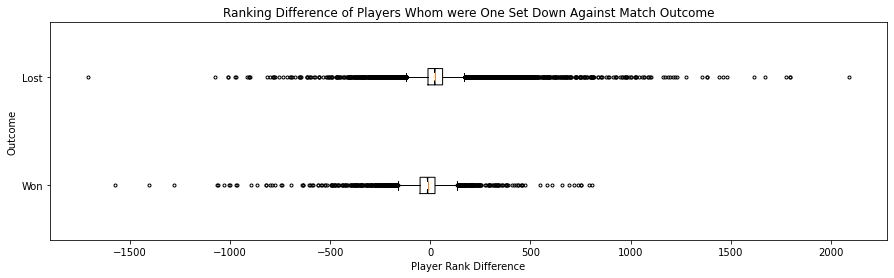

Outcome: Won
The lower quartile is: -51.5
The median is: -14.0
The upper quartile is: 23.0

Outcome: Lost
The lower quartile is: -12.0
The median is: 22.0
The upper quartile is: 61.0


In [9]:
won_rank_diff = training_df_clean[(training_df_clean['Has_Won']==1) & (training_df_clean['Rank_Diff'].notna())]['Rank_Diff'].values.tolist()
lost_rank_diff = training_df_clean[(training_df_clean['Has_Won']==0) & (training_df_clean['Rank_Diff'].notna())]['Rank_Diff'].values.tolist()
plt.figure(figsize=(15,4))
plt.boxplot([won_rank_diff, lost_rank_diff], vert=False, notch=True, flierprops={'marker': '.'})
plt.title('Ranking Difference of Players Whom were One Set Down Against Match Outcome')
plt.ylabel('Outcome')
plt.xlabel('Player Rank Difference')
plt.yticks([1,2], ['Won', 'Lost'])
plt.show()
print("Outcome: Won")
print(f'The lower quartile is: {np.percentile(won_rank_diff, 25)}')
print(f'The median is: {np.median(won_rank_diff)}')
print(f'The upper quartile is: {np.percentile(won_rank_diff, 75)}')
print()
print("Outcome: Lost")
print(f'The lower quartile is: {np.percentile(lost_rank_diff, 25)}')
print(f'The median is: {np.median(lost_rank_diff)}')
print(f'The upper quartile is: {np.percentile(lost_rank_diff, 75)}')

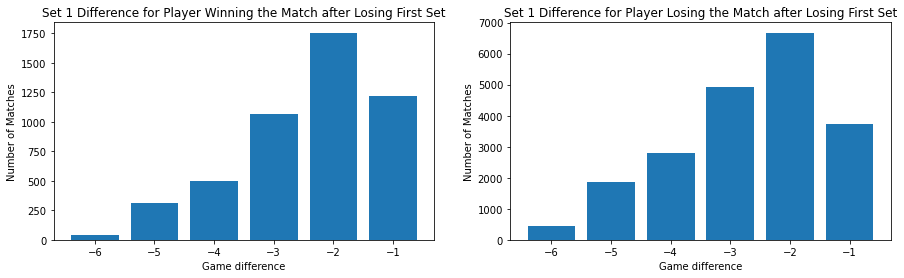

Outcome: Won
The lower quartile is: -3.0
The median is: -2.0
The upper quartile is: -2.0

Outcome: Lost
The lower quartile is: -3.0
The median is: -2.0
The upper quartile is: -2.0


In [10]:
won_set_diff = training_df_clean[(training_df_clean['Has_Won']==1) & (training_df_clean['Set1_Diff'].notna())]['Set1_Diff'].values.tolist()
lost_set_diff = training_df_clean[(training_df_clean['Has_Won']==0) & (training_df_clean['Set1_Diff'].notna())]['Set1_Diff'].values.tolist()

freqs, bins = np.histogram(won_set_diff, bins=6, range=(-6.5,-0.5))
won_set_dict = OrderedDict()
for i in range(len(bins)-1):
    won_set_dict[int(np.ceil(bins[i]))] = freqs[i]

freqs, bins = np.histogram(lost_set_diff, bins=6, range=(-6.5,-0.5))
lost_set_dict = OrderedDict()
for i in range(len(bins)-1):
    lost_set_dict[int(np.ceil(bins[i]))] = freqs[i]

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title('Set 1 Difference for Player Winning the Match after Losing First Set')
plt.ylabel('Number of Matches')
plt.xlabel('Game difference')
plt.xticks(range(-6,0))
plt.bar(won_set_dict.keys(), won_set_dict.values())

plt.subplot(122)
plt.title('Set 1 Difference for Player Losing the Match after Losing First Set')
plt.ylabel('Number of Matches')
plt.xlabel('Game difference')
plt.xticks(range(-6,0))
plt.bar(lost_set_dict.keys(), lost_set_dict.values())

plt.show()

print("Outcome: Won")
print(f'The lower quartile is: {np.percentile(won_set_diff, 25)}')
print(f'The median is: {np.median(won_set_diff)}')
print(f'The upper quartile is: {np.percentile(won_set_diff, 75)}')
print()
print("Outcome: Lost")
print(f'The lower quartile is: {np.percentile(lost_set_diff, 25)}')
print(f'The median is: {np.median(lost_set_diff)}')
print(f'The upper quartile is: {np.percentile(lost_set_diff, 75)}')

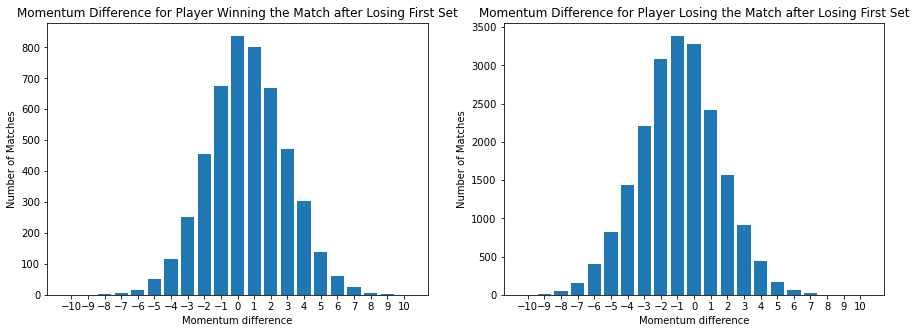

Outcome: Won
The lower quartile is: -1.0
The median is: 1.0
The upper quartile is: 2.0

Outcome: Lost
The lower quartile is: -2.0
The median is: -1.0
The upper quartile is: 1.0


In [11]:
won_momentum_diff = training_df_clean[(training_df_clean['Has_Won']==1) & (training_df_clean['Momentum10_Diff'].notna())]['Momentum10_Diff'].values.tolist()
lost_momentum_diff = training_df_clean[(training_df_clean['Has_Won']==0) & (training_df_clean['Momentum10_Diff'].notna())]['Momentum10_Diff'].values.tolist()

freqs, bins = np.histogram(won_momentum_diff, bins=21, range=(-10.5,10.5))
won_momentum_dict = OrderedDict()
for i in range(len(bins)-1):
    won_momentum_dict[int(np.ceil(bins[i]))] = freqs[i]
    
freqs, bins = np.histogram(lost_momentum_diff, bins=21, range=(-10.5,10.5))
lost_momentum_dict = OrderedDict()
for i in range(len(bins)-1):
    lost_momentum_dict[int(np.ceil(bins[i]))] = freqs[i]
    
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Momentum Difference for Player Winning the Match after Losing First Set')
plt.ylabel('Number of Matches')
plt.xlabel('Momentum difference')
plt.xticks(range(-10,11))
plt.bar(won_momentum_dict.keys(), won_momentum_dict.values())

plt.subplot(122)
plt.title('Momentum Difference for Player Losing the Match after Losing First Set')
plt.ylabel('Number of Matches')
plt.xlabel('Momentum difference')
plt.xticks(range(-10,11))
plt.bar(lost_momentum_dict.keys(), lost_momentum_dict.values())

plt.show()

print("Outcome: Won")
print(f'The lower quartile is: {np.percentile(won_momentum_diff, 25)}')
print(f'The median is: {np.median(won_momentum_diff)}')
print(f'The upper quartile is: {np.percentile(won_momentum_diff, 75)}')
print()
print("Outcome: Lost")
print(f'The lower quartile is: {np.percentile(lost_momentum_diff, 25)}')
print(f'The median is: {np.median(lost_momentum_diff)}')
print(f'The upper quartile is: {np.percentile(lost_momentum_diff, 75)}')

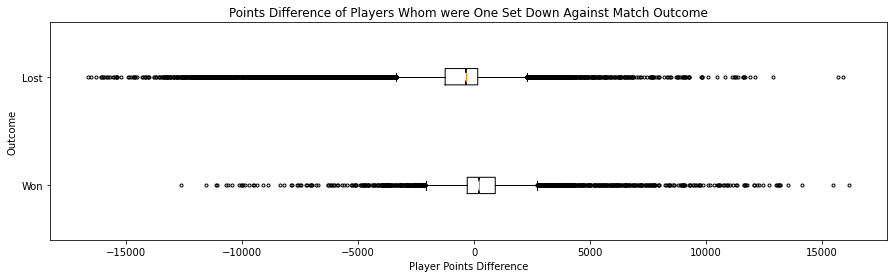

Outcome: Won
The lower quartile is: -295.5
The median is: 210.0
The upper quartile is: 911.0

Outcome: Lost
The lower quartile is: -1247.5
The median is: -353.0
The upper quartile is: 156.0


In [12]:
won_pts_diff = training_df_clean[(training_df_clean['Has_Won']==1) & (training_df_clean['Pts_Diff'].notna())]['Pts_Diff'].values.tolist()
lost_pts_diff = training_df_clean[(training_df_clean['Has_Won']==0) & (training_df_clean['Pts_Diff'].notna())]['Pts_Diff'].values.tolist()

plt.figure(figsize=(15,4))
plt.boxplot([won_pts_diff, lost_pts_diff], vert=False, notch=True, flierprops={'marker': '.'})
plt.title('Points Difference of Players Whom were One Set Down Against Match Outcome')
plt.ylabel('Outcome')
plt.xlabel('Player Points Difference')
plt.yticks([1,2], ['Won', 'Lost'])
plt.show()
print("Outcome: Won")
print(f'The lower quartile is: {np.percentile(won_pts_diff, 25)}')
print(f'The median is: {np.median(won_pts_diff)}')
print(f'The upper quartile is: {np.percentile(won_pts_diff, 75)}')
print()
print("Outcome: Lost")
print(f'The lower quartile is: {np.percentile(lost_pts_diff, 25)}')
print(f'The median is: {np.median(lost_pts_diff)}')
print(f'The upper quartile is: {np.percentile(lost_pts_diff, 75)}')


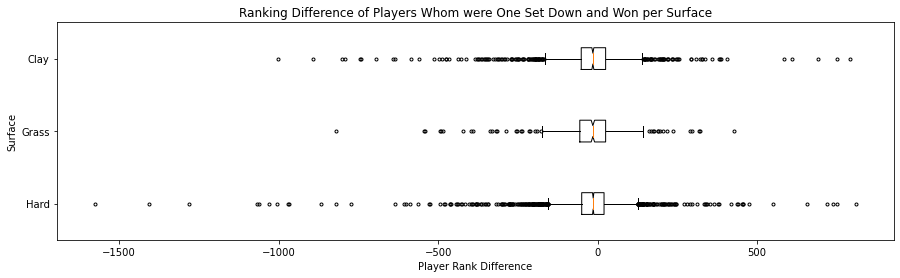

Surface: Clay
The lower quartile is: -50.0
The median is: -14.0
The upper quartile is: 20.0
IQR is: 70.0

Surface: Grass
The lower quartile is: -56.0
The median is: -15.0
The upper quartile is: 25.0
IQR is: 81.0

Surface: Hard
The lower quartile is: -51.5
The median is: -15.0
The upper quartile is: 25.0
IQR is: 76.5


In [13]:
# But does the surface type have any impact on the likelihood of winning after a set down
won_rank_diff_surfaces = []

surfaces = sorted(training_df_clean['Surface'].unique().tolist(), reverse=True)

for surface in surfaces:
    data = training_df_clean[(training_df_clean['Has_Won']==1) & (training_df_clean['Rank_Diff'].notna()) & (training_df_clean['Surface']==surface)]['Rank_Diff'].values.tolist()
    won_rank_diff_surfaces.append(data)
plt.figure(figsize=(15,4))
plt.boxplot(won_rank_diff_surfaces, vert=False, notch=True, flierprops={'marker':'.'})
plt.title('Ranking Difference of Players Whom were One Set Down and Won per Surface')
plt.ylabel('Surface')
plt.xlabel('Player Rank Difference')
plt.yticks([i for i in range(1, len(surfaces)+1)], surfaces)
plt.show()

print("Surface: Clay")
print(f'The lower quartile is: {np.percentile(won_rank_diff_surfaces[0], 25)}')
print(f'The median is: {np.median(won_rank_diff_surfaces[0])}')
print(f'The upper quartile is: {np.percentile(won_rank_diff_surfaces[0], 75)}')
print(f'IQR is: {np.percentile(won_rank_diff_surfaces[0], 75) - np.percentile(won_rank_diff_surfaces[0], 25)}')
print()
print("Surface: Grass")
print(f'The lower quartile is: {np.percentile(won_rank_diff_surfaces[1], 25)}')
print(f'The median is: {np.median(won_rank_diff_surfaces[1])}')
print(f'The upper quartile is: {np.percentile(won_rank_diff_surfaces[1], 75)}')
print(f'IQR is: {np.percentile(won_rank_diff_surfaces[1], 75) - np.percentile(won_rank_diff_surfaces[1], 25)}')
print()
print("Surface: Hard")
print(f'The lower quartile is: {np.percentile(won_rank_diff_surfaces[2], 25)}')
print(f'The median is: {np.median(won_rank_diff_surfaces[2])}')
print(f'The upper quartile is: {np.percentile(won_rank_diff_surfaces[2], 75)}')
print(f'IQR is: {np.percentile(won_rank_diff_surfaces[2], 75) - np.percentile(won_rank_diff_surfaces[2], 25)}')

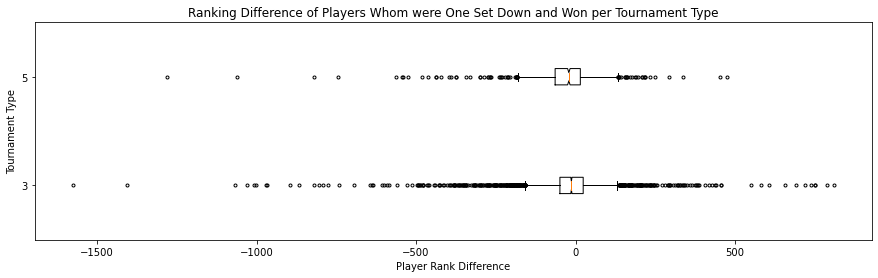

Tournament Type: ATP
The lower quartile is: -49.0
The median is: -13.0
The upper quartile is: 24.0
IQR is: 73.0

Tournament Type: Grandslam
The lower quartile is: -64.0
The median is: -21.0
The upper quartile is: 15.0
IQR is: 79.0



In [14]:
# Does it matter if grandslam vs non-grandslam

won_rank_diff_slam = []

tournament_types = sorted(training_df_clean['Best of'].unique().tolist())

for tournament_type in tournament_types:
    data = training_df_clean[(training_df_clean['Has_Won']==1) & (training_df_clean['Rank_Diff'].notna()) & (training_df_clean['Best of']==tournament_type)]['Rank_Diff'].values.tolist()
    won_rank_diff_slam.append(data)
    
plt.figure(figsize=(15,4))
plt.boxplot(won_rank_diff_slam, vert=False, notch=True, flierprops={'marker':'.'})
plt.title('Ranking Difference of Players Whom were One Set Down and Won per Tournament Type')
plt.ylabel('Tournament Type')
plt.xlabel('Player Rank Difference')
plt.yticks([i for i in range(1, len(tournament_types)+1)], tournament_types)
plt.show()

print("Tournament Type: ATP")
print(f'The lower quartile is: {np.percentile(won_rank_diff_slam[0], 25)}')
print(f'The median is: {np.median(won_rank_diff_slam[0])}')
print(f'The upper quartile is: {np.percentile(won_rank_diff_slam[0], 75)}')
print(f'IQR is: {np.percentile(won_rank_diff_slam[0], 75) - np.percentile(won_rank_diff_slam[0], 25)}')
print()
print("Tournament Type: Grandslam")
print(f'The lower quartile is: {np.percentile(won_rank_diff_slam[1], 25)}')
print(f'The median is: {np.median(won_rank_diff_slam[1])}')
print(f'The upper quartile is: {np.percentile(won_rank_diff_slam[1], 75)}')
print(f'IQR is: {np.percentile(won_rank_diff_slam[1], 75) - np.percentile(won_rank_diff_slam[1], 25)}')
print()